# [ハンズオン]
# 予測モデルの作成：自動車燃費性能の予測
- 実際にコードを動かし、予測モデルの作成の一連の流れを学びます。
- 自動車の燃費性能を予測するモデルを作成します。
- 実際に走行テストにて燃費性能の測定は時間・人件費・ハード面などのコストがかかります。
- そこで、走行テストをせずに自動車の特性データから燃費性能を予測するモデルを作成します。
- また予測したモデルの精度を評価しましょう。
- 出典：[SIGNAT 自動車環境性能の改善](https://quest.signate.jp/quests/10001)


## 機械学習の手順
- 1.課題分析
  - 課題：効率的に自動車開発をしたい。自動車の燃費性能を予測するモデル作成したい。
  - データ：自動車の特性データ（エンジンサイズ、重量、馬力など）
  - 目的：燃費性能（mpg）を予測する回帰モデルを構築
- 2.データ収集:
  - データセット：自動車の特性データセットを使用
  - 特徴量：エンジンサイズ、重量、馬力、シリンダー数、トランスミッションタイプなど
  - 目的変数：燃費性能（mpg）
- 3.前処理
  - データのクリーニング：欠損値の処理、異常値の除去
  - 特徴量エンジニアリング：カテゴリ変数のエンコーディング、数値変数のスケーリング
  - データ分割：トレーニングセットとテストセットに分割
- 4.モデル学習
  - モデル選定：回帰モデル（線形回帰、ランダムフォレストなど）を選択
  - ハイパーパラメータの調整：グリッドサーチやランダムサーチを使用して最適なパラメータを探索
  - モデルの学習：トレーニングセットを使用してモデルを学習
- 5.モデル評価
  -  評価指標：平均二乗誤差（MSE）、決定係数（R^2）などを使用
  - テストセットを使用してモデルの性能を評価

![機械学習の手順](./img/img06.png)

## 予測モデルについて
- 予測モデルの作成にあたって、下記チートマップに沿ってモデルを選定します。

![scikit-learn:モデルの選定](./img/img07.png)

## モデルの評価
- 作成したモデルは精度を確認するために以下の評価指標を使用します。
  - 正解率（Accuracy）：正しく予測できた割合
  - 適合率（Precision）：正と予測した中で実際に正であった割合
  - 再現率（Recall）：実際に正であった中で正と予測できた割合
  - F1スコア：適合率と再現率の調和平均
  - MAE（平均絶対誤差）：予測値と実際の値の差の絶対値の平均
  - MSE（平均二乗誤差）：予測値と実際の値の差の二乗の平均
  - RMSE（平均二乗根誤差）：MSEの平方根
  - 関係係数：予測値と実際の値の相関を示す指標
  - 決定係数（R^2）：モデルがデータの分散をどれだけ説明できるかを示す指標

- 作成したモデルによって使用する評価指標は異なります。

In [1]:
## 必要なライブラリをインポート
import pandas as pd  
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns
## scikit-learnライブラリ
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
## 決定係数（r2_score）のモジュール
from sklearn.metrics import r2_score

## ライブラリについて
|ライブラリ|用途|
|:----|:----|
|pandas|データ解析を支援する機能を提供するライブラリ|
|numpy|数値計算を効率的に行うための拡張モジュール|
|matplotlib|NumPyのためのグラフ描画ライブラリ|
|japanize_matplotlib|グラフ描画を日本語に対応|
|seaborn|統計的データ可視化に特化しており、魅力的で理解しやすいグラフを作成|
|scikit-learn|データ分析や機械学習のためのライブラリ|
|train_test_split|データを学習用データとテスト用データにランダムに分割するための関数|
|LinearRegression(LR)|線形回帰を行うためのクラス|
|mean_squared_error(MSE)|回帰モデルを評価するためのクラス|


## 1.課題分析
- 背景
  - 走行実験において排出ガス規制をクリアできずに新型車の開発に失敗するというケースが発生して、大きな損失を出していた。
  - 問題点は実際に走行実験を実施しないと排出ガス規制をクリアできる燃費性能であるか評価できない点にあり解決策を見出したい。
- 解決策
  - あらかじめ燃費性能を計算することができればこの問題を解決できる可能性がある
  - 過去の自動車のデータを利用し、燃費を予測する機械学習モデルを作成
- アクションプラン
  - 走行実験前に燃費性能を評価ができれば、効率的に新型車の開発が進み、損失を減らす事できる。

## 2.データの読込

#### pandasのデータ読込関数

- csvファイルの場合
```python
pd.read_csv('[failname].csv', sep= ',[区切り文字]')
```

- tsvファイルの場合
```python
pd.read_csv('[failname].tsv', sep= '\t[区切り文字]')
```

In [2]:
df01 = pd.read_csv('./sample_data/train.tsv', sep = '\t')
df01

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.0,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)


## カラム説明

ヘッダ名称|データ型|説明|
|:----|:----|:----|
|id|int|インデックスとして使用|
|mpg|float|ガソリン１ガロンあたりの走行距離（mile par gallon の略）|
|cylinders|varchar|シリンダー|
|displacement|float|排気量|
|horsepower|float|馬力|
|weight|float|重量|
|acceleration|float|加速度|
|model year|varchar|年式|
|origin|varchar|起源|
|car name|varchar|車名|

※　マイル毎ガロン（mile per gallon, mpg）は、アメリカ合衆国で使用される燃費の単位で、1ガロンの燃料で走行できる距離をマイルで表したものです。<br/>
※　km/L = 1mpg × 0.425144


In [3]:
## データの中身を確認
print(f'カラム数：{df01.shape[0]}')
print(f'レコード数：{df01.shape[1]}')
df01.info()

カラム数：199
レコード数：10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   mpg           199 non-null    float64
 2   cylinders     199 non-null    int64  
 3   displacement  199 non-null    float64
 4   horsepower    195 non-null    float64
 5   weight        199 non-null    float64
 6   acceleration  199 non-null    float64
 7   model year    199 non-null    int64  
 8   origin        199 non-null    int64  
 9   car name      199 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 15.7+ KB


#### 【horsepower(馬力)のデータについて】
- データ型がfloat型
- 195のデータが存在
- 4のnullデータが存在

In [4]:
## 基本統計量を確認(量的データのみ出力)
df01.describe()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,195.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,101.297436,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,35.562255,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,75.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,92.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,114.000000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,220.000000,5140.000000,23.700000,82.000000,3.000000


In [5]:
## 基本統計量を確認(質的データのみ)
'''
count:データ数
unique:重複を除いたデータ数
top:最頻値の文字列
freq: 最頻値
'''
df01.describe(exclude='number')

,car name
count,199
unique,167
top,chevrolet impala
freq,4


count    199.000000
mean     183.311558
std       98.400457
min       71.000000
25%       98.000000
50%      140.000000
75%      250.000000
max      454.000000
Name: displacement, dtype: float64


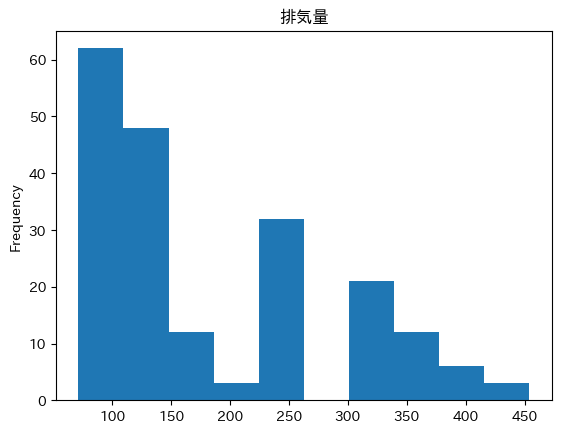

In [6]:
#### 排気量(displacement)のデータをヒストグラムで可視化
print(df01['displacement'].describe())
displacement_var = df01['displacement']
displacement_var.plot.hist(title='排気量')
plt.show()

count    199.000000
mean      24.307035
std        7.797665
min        9.000000
25%       18.000000
50%       24.000000
75%       30.500000
max       44.600000
Name: mpg, dtype: float64


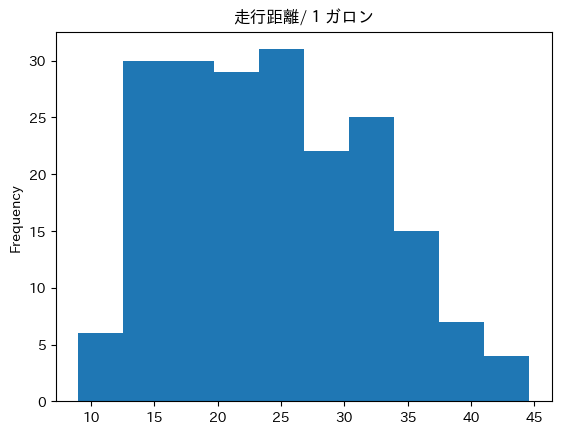

In [7]:
## ガソリン１ガロンあたりの走行距離(mpg)のデータをヒストグラムで可視化
print(df01['mpg'].describe())
mpg_var = df01['mpg']
mpg_var.plot.hist(title='走行距離/１ガロン')
plt.show()

In [8]:
## 相関関係の確認
'''
df01から量的なデータのみ抽出
corr関数：相関関係を出力する関数
'''
df01_corr = df01[["mpg","displacement","horsepower","weight","acceleration","model year","origin"]]
df01_corr.corr()

,mpg,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.804635,-0.791419,-0.820660,0.379721,0.568471,0.533671
displacement,-0.804635,1.000000,0.894965,0.933038,-0.523955,-0.329817,-0.579805
horsepower,-0.791419,0.894965,1.000000,0.872336,-0.661741,-0.384597,-0.421929
weight,-0.820660,0.933038,0.872336,1.000000,-0.401757,-0.265562,-0.535893
acceleration,0.379721,-0.523955,-0.661741,-0.401757,1.000000,0.194854,0.189193
model year,0.568471,-0.329817,-0.384597,-0.265562,0.194854,1.000000,0.124279
origin,0.533671,-0.579805,-0.421929,-0.535893,0.189193,0.124279,1.000000


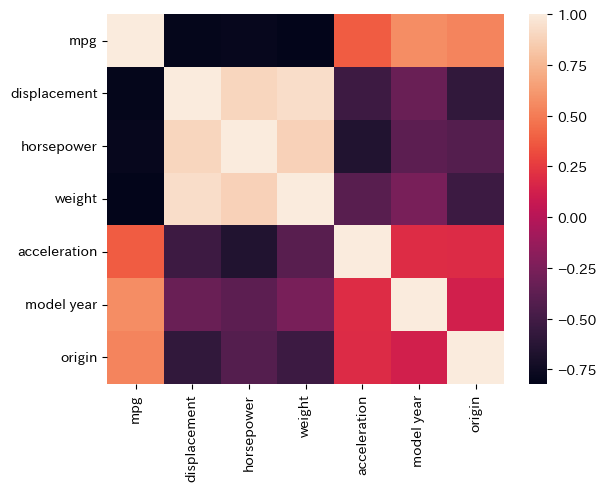

In [9]:
## 相関関係を可視化
corr_matrix = df01_corr.corr()
sns.heatmap(corr_matrix)
plt.show()

#### 相関関係からわかる事
- ガソリン１ガロンあたりの走行距離(mpg)
  - 正の相関
    - acceleration（加速度）：0.379721
    - model year（年式）：0.568471
    - origin（起源）：0.533671
  - 負の相関
    - displacement(排気量)：-0.804635
    - horsepower(馬力)：-0.791419
    - weight（重量）：-0.820660

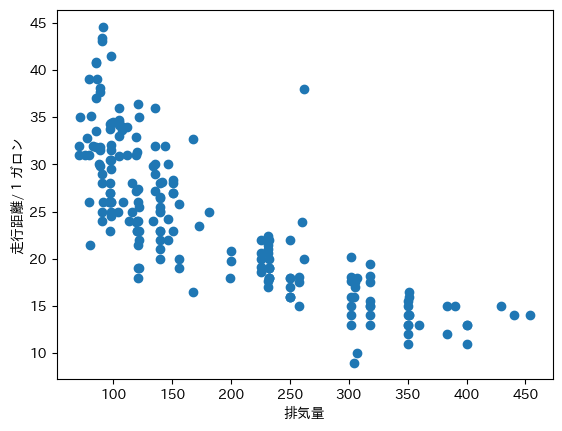

In [10]:
# 横軸に「排気量」、縦軸に「燃費」を割り当て散布図を描画
plt.scatter(df01['displacement'],df01['mpg'])

# x軸とy軸に名前を付与
plt.xlabel('排気量')
plt.ylabel('走行距離/１ガロン')
plt.show()

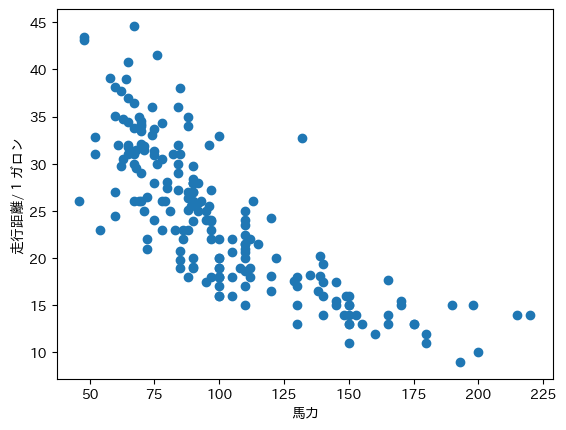

In [11]:
# 横軸に「馬力」、縦軸に「燃費」を割り当て散布図を描画
plt.scatter(df01['horsepower'],df01['mpg'])

# x軸とy軸に名前を付与
plt.xlabel('馬力')
plt.ylabel('走行距離/１ガロン')
plt.show()

## 3.前処理

In [13]:
## isnull関数とsum関数を組合せて各カラムにある欠損値を求める
df01.isnull().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      4
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
## df01をコピー
## nullがあるレコードは削除
df02 = df01.copy(deep=True)
df02.dropna(inplace=True)
df02.isnull().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## 4.モデルの学習

In [15]:
df03 = df02.copy(deep=True)
## idは機械学習をする際に不要な為削除
df03.drop(columns=['id'],inplace=True)
## データを確認
df03.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 198
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           195 non-null    float64
 1   cylinders     195 non-null    int64  
 2   displacement  195 non-null    float64
 3   horsepower    195 non-null    float64
 4   weight        195 non-null    float64
 5   acceleration  195 non-null    float64
 6   model year    195 non-null    int64  
 7   origin        195 non-null    int64  
 8   car name      195 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 15.2+ KB


In [16]:
## 説明変数、目的変数を設定
'''
説明変数(x):ガソリン１ガロンあたりの走行距離(mpg)
目的変数(y):シリンダー,	排気量,	馬力,	重量,	加速度,	年式,	起源
'''
y= df03["mpg"]
x= df03[["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]]

In [17]:
## train_test_split関数にて
## 学習データと評価データに分割
'''
test_size=0.2
80%を学習用データ
20%を評価データ

乱数を固定するときシード値を設定
再現性の確保
比較可能性の向上
開発現場では慣例的に42が使われる。（特に重要な意味はない）
random_state=42
'''
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## 重回帰モデル
- 重回帰モデルは線形回帰モデルの1つ
- 説明変数displacementを横軸に、目的変数mpgを縦軸に散布図
- 2つ以上の複数の説明変数から目的変数を予測する線形回帰モデルを重回帰モデル
- 回帰モデルの作成するにあたり、scikit-learnライブラリのLinearRegressionを利用
- モデルを表す箱を準備し、その箱を表す変数へ代入する必要

```
model = LR()
```

- モデルの学習にはfit関数を使い、引数の中に、説明変数、目的変数の順番で記述

In [18]:
## 重回帰モデルを準備
model_lr = LR()

In [19]:
## 用意したモデルに説明変数と目的変数を渡して学習させる
'''
x_train: 訓練データの目的変数
y_train: 訓練データの説明変数
'''
model_lr.fit(x_train,y_train)

LinearRegression()

- sklearnライブラリを使ったモデルでは、predict関数を使うことで予測値を取得することができます。
```python
model.predict([テストデータの目的変数])
```

In [20]:
## 訓練データ(目的変数)を学習させたモデルに渡し予測結果を求める
## テストデータ(x_train)を使って予測
y_train_pred = model_lr.predict(x_train)
print('【訓練データから予測した燃費(MPG)の予測】')
print(y_train_pred)

【訓練データから予測した燃費(MPG)の予測】
[31.14026873  7.72243156 28.10123229 31.79378944 23.29370533 35.27982929
 13.83404018 26.23373481 24.77141157 16.26158854 23.91944647 34.83476376
 25.17434218 17.35643583 26.62321231 29.78056048 19.60203362 10.48751455
 26.95515652 27.81128591 25.18050674  9.52909676 31.29116848 22.57533619
 30.79660013 29.17077888 23.39898188 29.16591611 27.35892113 30.64137518
 29.53641459 12.1044854  21.45454736 14.15002298 20.85919408 17.4885886
 29.960695   18.8355081  22.83282824 19.86406541 34.30404582 12.1588945
 25.17447645 27.94759712 19.21391909 26.68392983 23.08390748 18.46089081
 12.43794404 26.68710486 12.4118533  20.10555596 21.56920049 28.31301825
 32.13823889 19.74002703 30.71792843 18.99267787 19.38381529 30.36854303
 19.38318968 17.32163486 27.18408114 31.91216482 31.33856314 28.05623226
 26.77713341 28.91567516 35.6355599  28.50318857 11.01588455 22.85696756
 19.51632818 28.16930462 20.07155049 24.42116806 26.01459913 21.23851242
 32.33681501 29.68146641 34.0

## 5.モデルの評価
- 学習させたモデルが正解に限りなく近い数値になっているか精度を評価します。
- 回帰モデル（値を予測するために使われるモデル）にはMAE・MSE・RMSE・決定係数が用いられます。
- 今回はMSE（平均二乗誤差）とRMSE（二乗平均平方根誤差）を用いてモデルの評価をします。

### 平均二乗誤差(MSE: Mean Squared Error)とは
- 各データに対して「予測値と正解値の差（＝誤差）」の二乗値を計算します。
- その総和をデータ数で割った値になります。
- 0に近いほど良い評価になります。
- 誤差を二乗していること、つまり単位が変わってしまっており、解釈がしにくい欠点があります。
- 単位問題を回避するためにルートを使って元の単位に戻すRMSEがもちいられます。

![MSE](./img/img03.png)

- MSEの欠点
![MSEの評価誤差](./img/img04.png)

### 二乗平均平方根誤差(RMSE: Root Mean Squared Error)
- MSEの結果を平方根を取った値になります
- 0に近いほど良い評価になります。
- ただし外れ値に敏感になるので、それが問題となることがあります。


### pythonでの評価方法
- scikit-learnライブラリにMSEのモジュールがあるのでインポートします。
- 残念ながらRMSEのモジュールはないので、numpyのsqrt関数を利用してRMSEを算出します
  
```python
## MSEのモジュール
from sklearn.metrics import mean_squared_error as MSE

## 平均二乗誤差(MSE)を算出
MSE([実績値(y_train)], [予測値(y_train_pred)])

## 二乗平均平方根誤差(RMSE)を算出
np.sqrt(MSE([実績値(y_train)], [予測値(y_train_pred)]))
```

In [21]:
## 平均二乗誤差(MSE)を算出
mse_result = MSE(y_train,y_train_pred)

## 二乗平均平方根誤差(RMSE)を算出
rmse_result = np.sqrt(MSE(y_train,y_train_pred))

## MSEとRMSEの結果を出力
print(f' 平均二乗誤差(MSE):{mse_result}')
print(f' 二乗平均平方根誤差(RMSE):{rmse_result}')

 平均二乗誤差(MSE):11.160135729643972
 二乗平均平方根誤差(RMSE):3.3406789324393285


### 決定係数について
- 「r2_score」は、第一引数に目的変数の真値データを与えて、第二引数に予測データを与えると決定係数を出力します。
- 決定係数は0から1の範囲の値をとり、1に近づくほど予測モデルの精度が高いことを示します。

#### 決定係数の目安
![決定係数の目安](./img/img05.png)

### pythonでの評価方法
```python
## 決定係数（r2_score）のモジュール
from sklearn.metrics import r2_score

r2_score([実績値(y_train)],[予測値(y_train_pred)])
```

In [22]:
## 決定係数（r2_score）
r2_score_result = r2_score(y_train,y_train_pred)
print(f'R2スコア：{r2_score_result}')

R2スコア：0.8182110481358478


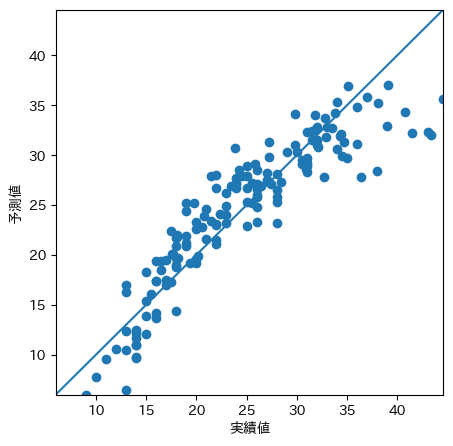

In [23]:
## 散布図の描画
plt.figure(figsize=(5,5))
plt.scatter(y_train,y_train_pred)

## 実測値と予測値の最小値・最大値を求める
### 実測値
train_max = np.max(y_train)
train_min = np.min(y_train)
### 予測値
train_pred_max = np.max(y_train_pred)
train_pred_min = np.min(y_train_pred)

## 実測値と予測値の最小値・最大値を比較し、最終的な最小値と最大値を求める
max_value = np.maximum(train_max,train_pred_max)
min_value = np.minimum(train_min,train_pred_min)

# x軸およびy軸の値域を指定する
plt.xlim([min_value,max_value])
plt.ylim([min_value,max_value])

# 対角線を引く
plt.plot([min_value, max_value],[min_value,max_value])

# x軸とy軸に名前を付ける
plt.xlabel('実績値')
plt.ylabel('予測値')

# 作成した散布図を出力
plt.show()

#### 上記の散布図の解釈について
- 予測値が全て実測値を当てられていれば、対角線の直線状に点が全て表示されることになります。
- 上振れ／下振れに予測しがちなのかや、極端に外すような予測点がないかを確認することができます。
- 燃費（MPG）が35以上だと対角線より外れ、予測に誤差が生じている（過少評価）と解釈が出来ます。

<hr>

｜[<<学習ロードマップ](../3_学習ロードマップについて.md) ｜[目次](../../README.md)｜